Classification report for classifier SVC(C=10, gamma=0.0001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.99      1.00      0.99        91
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        89
           8       0.99      0.99      0.99        88
           9       1.00      0.99      0.99        92

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0  0 92  0  0  0  0

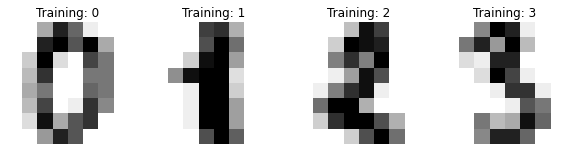

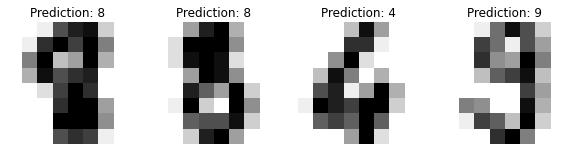

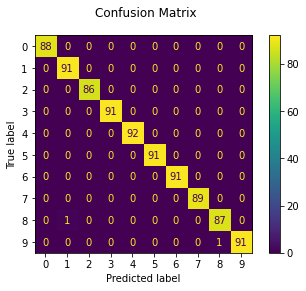

In [17]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import pandas as pd
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

gamma_list=[0.01, 0.005, 0.001, 0.0005, 0.0001]
c_list=[0.1 ,0.2 ,0.5 ,0.7 ,1 ,2 ,5 ,7 ,10]
#model hyper_parameters

train_frac=0.1
test_frac=0.1
dev_frac=0.1

# Split data into 50% train and 50% test subsets

X_train, X_dev_test, y_train, y_dev_test = train_test_split(
    data, digits.target, test_size=1-train_frac, shuffle=True
)
dev_test_frac=1-train_frac
X_train, X_dev, y_train, y_dev = train_test_split(
    X_dev_test, y_dev_test, test_size=(dev_frac)/dev_test_frac, shuffle=True
)



In [19]:
df =pd.DataFrame()

g = []
cc=[]
accuracy =[]

for GAMMA in gamma_list:
    for c in c_list:
        # Create a classifier: a support vector classifier
        clf = svm.SVC(gamma=GAMMA, C=c)
        
        # Learn the digits on the train subset
        clf.fit(X_train, y_train)

        # Predict the value of the digit on the test subset
        predicted = clf.predict(X_dev)
        
        score = accuracy_score(y_pred=predicted,y_true=y_dev)
        
        g.append(GAMMA)
        cc.append(c)
        accuracy.append(score)
        
        
df['Gamma'] = g
df['C']= cc
df['Accuracy'] = accuracy

df

,Gamma,C,Accuracy
0,0.0100,0.1,0.050000
1,0.0100,0.2,0.050000
2,0.0100,0.5,0.155556
3,0.0100,0.7,0.372222
4,0.0100,1.0,0.755556
5,0.0100,2.0,0.777778
6,0.0100,5.0,0.777778
7,0.0100,7.0,0.777778
8,0.0100,10.0,0.777778
9,0.0050,0.1,0.127778


the image with the sizePrediction: 6image_resized :[[ 2.20564474 10.55598429 12.6980377   3.04301516]
 [ 0.37247094  7.51150768 14.21022106  2.81808274]]

the image with the sizePrediction: 2image_resized :[[ 1.24365675 12.99113129 10.07554302  0.52958716]
 [ 0.74332678  9.70110113 10.32818583  2.33040861]]

the image with the sizePrediction: 1image_resized :[[ 1.24566568  7.78975905  5.74024154  0.41322861]
 [ 5.41064012  9.83146054 11.0274678   1.37644497]]

the image with the sizePrediction: 3image_resized :[[0.52756329 7.47607912 9.40761849 3.5383385 ]
 [1.53346131 5.90308085 8.80582311 2.59788774]]



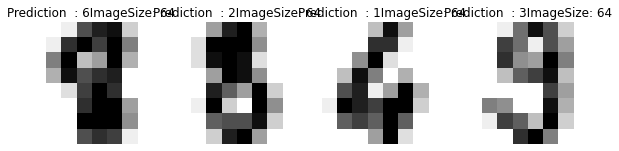

In [20]:
from PIL import Image
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    image_resized = resize(image, (int(image.shape[0] // 4), int(image.shape[1] // 2)),
                       anti_aliasing=True)
    


    ax.set_title(f"Prediction  : {prediction}" f"ImageSize: {image.size}")
    print("the image with the size" f"Prediction: {prediction}" f"image_resized :{image_resized}\n")

In [22]:
a= df['Accuracy']
maximum = a.max()
index = a.idxmax()

print("The best test score is ", maximum," corresponding to hyperparameters gamma= ",g[index]," C=",cc[index])

The best test score is  0.9944444444444445  corresponding to hyperparameters gamma=  0.001  C= 0.2
